In [39]:
# !pip install neurokit2
import neurokit2 as nk

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [41]:
dhea = pd.read_csv('https://raw.githubusercontent.com/Alwafauzan/skripsi/main/DASS/dhea_tkr.csv',sep = ';')
kanwa = pd.read_csv('https://raw.githubusercontent.com/Alwafauzan/skripsi/main/DASS/kanwa_tkr.csv',sep = ';')
visky = pd.read_csv('https://raw.githubusercontent.com/Alwafauzan/skripsi/main/DASS/visky_tkr.csv',sep = ';')
elya = pd.read_csv('https://raw.githubusercontent.com/Alwafauzan/skripsi/main/DASS/elya_tkr.csv',sep = ';')
nopen = pd.read_csv('https://raw.githubusercontent.com/Alwafauzan/skripsi/main/DASS/nopen_tkr.csv',sep = ';')
nopen2 = pd.read_csv('https://raw.githubusercontent.com/Alwafauzan/skripsi/main/DASS/nopen_tkr2.csv',sep = ';')
nanda = pd.read_csv('https://raw.githubusercontent.com/Alwafauzan/skripsi/main/DASS/nanda_tkr.csv',sep = ';')
nandaeka = pd.read_csv('https://raw.githubusercontent.com/Alwafauzan/skripsi/main/DASS/nandakkn_tkr.csv',sep = ';')
pradja = pd.read_csv('https://raw.githubusercontent.com/Alwafauzan/skripsi/main/DASS/pradja_tkr.csv',sep = ';')
rico = pd.read_csv('https://raw.githubusercontent.com/Alwafauzan/skripsi/main/DASS/rico_tkr.csv',sep = ';')
fauzi = pd.read_csv('https://raw.githubusercontent.com/Alwafauzan/skripsi/main/DASS/fauzi_tkr.csv',sep = ';')

In [42]:
# visky.plot(figsize = (50,10))
# elya

In [43]:
# fauzi[3000:4000].plot(figsize = (5,5))

In [44]:
def preprocess(path):
  path.columns = ["ir","waktu"]
  path = path[(path.waktu >10)]
  path = path[(path.waktu <=70)]

  return path

In [45]:
dhea = preprocess(dhea)
kanwa = preprocess(kanwa)
visky = preprocess(visky)
elya = preprocess(elya)
nopen = preprocess(nopen)
nopen2 = preprocess(nopen2)
nandaeka = preprocess(nandaeka)
pradja = preprocess(pradja)
rico = preprocess(rico)
fauzi = preprocess(fauzi)
elya

,ir,waktu
1038,2037,11
1039,2043,11
1040,2043,11
1041,2037,11
1042,2044,11
...,...,...
7033,1920,70
7034,1914,70
7035,1911,70
7036,1914,70


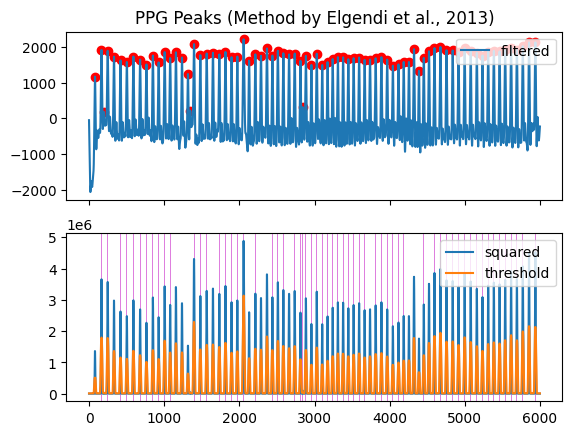

In [46]:
ppg_dhea = nk.ppg_clean(dhea[['ir']], sampling_rate=200)
peaks_dhea = nk.ppg_findpeaks(ppg_dhea, sampling_rate=35, show=False)

ppg_kanwa = nk.ppg_clean(kanwa[['ir']], sampling_rate=200)
peaks_kanwa = nk.ppg_findpeaks(ppg_kanwa, sampling_rate=35, show=False)

ppg_visky = nk.ppg_clean(visky[['ir']], sampling_rate=200)
peaks_visky = nk.ppg_findpeaks(ppg_visky, sampling_rate=35, show=False)

ppg_elya = nk.ppg_clean(elya[['ir']], sampling_rate=200)
peaks_elya = nk.ppg_findpeaks(ppg_elya, sampling_rate=35, show=False)

ppg_nopen = nk.ppg_clean(nopen[['ir']], sampling_rate=200)
peaks_nopen = nk.ppg_findpeaks(ppg_nopen, sampling_rate=35, show=False)

ppg_nopen2 = nk.ppg_clean(nopen2[['ir']], sampling_rate=200)
peaks_nopen2 = nk.ppg_findpeaks(ppg_nopen2, sampling_rate=35, show=False)

ppg_nandaeka = nk.ppg_clean(nandaeka[['ir']], sampling_rate=200)
peaks_nandaeka = nk.ppg_findpeaks(ppg_nandaeka, sampling_rate=35, show=False)

ppg_pradja = nk.ppg_clean(pradja[['ir']], sampling_rate=200)
peaks_pradja = nk.ppg_findpeaks(ppg_pradja, sampling_rate=35, show=False)

ppg_rico = nk.ppg_clean(rico[['ir']], sampling_rate=200)
peaks_rico = nk.ppg_findpeaks(ppg_rico, sampling_rate=35, show=True)

ppg_fauzi = nk.ppg_clean(fauzi[['ir']], sampling_rate=200)
peaks_fauzi = nk.ppg_findpeaks(ppg_fauzi, sampling_rate=35, show=False)

<Axes: xlabel='PPG_Peaks', ylabel='PPG_Peaks'>

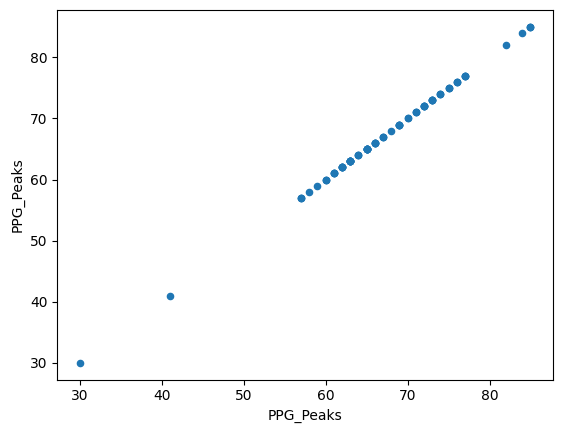

In [47]:
peaks_pradja = pd.DataFrame(peaks_pradja)
peaks_pradja_diff = peaks_pradja.diff()
# peaks_pradja_diff[1:]
# len(peaks_pradja_diff)
# angka = np.arange(1,len(peaks_pradja_diff),1)
# len(angka)
peaks_pradja_diff.plot(kind = 'scatter', x = 'PPG_Peaks', y = 'PPG_Peaks'  )

# plt.plot(peaks_pradja.diff())

In [48]:
def feature(peak):
  peak = pd.DataFrame(peak)
  hr = peak.count()/(1)
  hrv = peak.diff().var()
  std = peak.diff().std()

  return hr,hrv,std

In [49]:
hr_dhea,hrv_dhea,std_dhea = feature(peaks_dhea)
hr_kanwa,hrv_kanwa,std_kanwa = feature(peaks_kanwa)
hr_visky,hrv_visky,std_visky = feature(peaks_visky)
hr_elya,hrv_elya,std_elya = feature(peaks_elya)
hr_nopen,hrv_nopen,std_nopen = feature(peaks_nopen)
hr_nopen2,hrv_nopen2,std_nopen2 = feature(peaks_nopen2)
hr_nandaeka,hrv_nandaeka,std_nandaeka = feature(peaks_nandaeka)
hr_pradja,hrv_pradja,std_pradja = feature(peaks_pradja)
hr_rico,hrv_rico,std_rico = feature(peaks_rico)
hr_fauzi,hrv_fauzi,std_fauzi = feature(peaks_fauzi)


In [50]:
data = {
'Nama' : ["dhea","kanwa","visky","elya","nopen","nopen2","nandaeka","pradja","rico","fauzi"],
'HR' : [
int(hr_dhea),
int(hr_kanwa),
int(hr_visky),
int(hr_elya),
int(hr_nopen),
int(hr_nopen2),
int(hr_nandaeka),
int(hr_pradja),
int(hr_rico),
int(hr_fauzi),
],
'HRV' : [
int(hrv_dhea),
int(hrv_kanwa),
int(hrv_visky),
int(hrv_elya),
int(hrv_nopen),
int(hrv_nopen2),
int(hrv_nandaeka),
int(hrv_pradja),
int(hrv_rico),
int(hrv_fauzi),
],
'STD' : [
int(std_dhea),
int(std_kanwa),
int(std_visky),
int(std_elya),
int(std_nopen),
int(std_nopen2),
int(std_nandaeka),
int(std_pradja),
int(std_rico),
int(std_fauzi),
]
         }
pd.DataFrame(data)

,Nama,HR,HRV,STD
0,dhea,94,216,14
1,kanwa,82,138,11
2,visky,106,343,18
3,elya,123,417,20
4,nopen,126,167,12
5,nopen2,135,255,15
6,nandaeka,93,29,5
7,pradja,89,68,8
8,rico,80,138,11
9,fauzi,102,69,8
